In [1]:
#Import all libraries
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import nltk
from nltk.corpus import stopwords
import re
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import seaborn as sns
import string

In [2]:
#Read csv file
file=pd.read_csv("modi.csv")

In [3]:
file

,Tweet,Time,Date,Language,Like,Reply,Retweets,Timestamp
0,"स्वस्थ बिहार, विकसित बिहार।pic.twitter.com/6So...",04:22:00,17/02/19,hi,9525,778,2601,4:22 AM - 17 Feb 2019
1,हमारा प्रयास:\n\nउत्तम इन्फ्रास्ट्रक्चर\n\nगरी...,04:21:00,17/02/19,hi,16073,1221,3793,4:21 AM - 17 Feb 2019
2,आज कई ट्रेनों को हरी झंडी दिखाई। इनसे कनेक्टिव...,04:21:00,17/02/19,hi,8451,347,2223,4:21 AM - 17 Feb 2019
3,प्रधानमंत्री ऊर्जा गंगा योजना पूर्वी भारत के व...,04:20:00,17/02/19,hi,5596,214,1784,4:20 AM - 17 Feb 2019
4,Ensuring ‘Ease of Living’ for my sisters and b...,02:12:00,17/02/19,en,13186,899,3552,2:12 AM - 17 Feb 2019
5,Boosting Bihar’s development. Inaugurating mul...,23:42:00,16/02/19,en,17295,1426,5035,11:42 PM - 16 Feb 2019
6,This month’s #MannKiBaat programme will take p...,19:13:00,16/02/19,en,12449,1079,4015,7:13 PM - 16 Feb 2019
7,"Will be in Hazaribagh, Jharkhand today to inau...",19:09:00,16/02/19,en,11091,455,3790,7:09 PM - 16 Feb 2019
8,I look forward to being in Bihar’s Barauni. \n...,19:08:00,16/02/19,en,24218,1290,5680,7:08 PM - 16 Feb 2019
9,"Greetings to Telangana’s Chief Minister, Shri ...",19:06:00,16/02/19,en,16717,373,3073,7:06 PM - 16 Feb 2019


In [4]:
language=dict(file['Language'].value_counts()/len(file))

In [6]:
file['Language'].nunique()

22

In [565]:
language

{'en': 0.9704084467907752,
 'hi': 0.020700194498471797,
 'und': 0.0025006946373992774,
 'es': 0.0008335648791330926,
 'ja': 0.0008335648791330926,
 'gu': 0.0006946373992775772,
 'pa': 0.0004167824395665463,
 'te': 0.0004167824395665463,
 'et': 0.0004167824395665463,
 'in': 0.0004167824395665463,
 'fr': 0.0004167824395665463,
 'kn': 0.0002778549597110308,
 'ne': 0.0002778549597110308,
 'iw': 0.0002778549597110308,
 'ca': 0.0001389274798555154,
 'ht': 0.0001389274798555154,
 'ml': 0.0001389274798555154,
 'sl': 0.0001389274798555154,
 'da': 0.0001389274798555154,
 'de': 0.0001389274798555154,
 'nl': 0.0001389274798555154,
 'zh': 0.0001389274798555154}

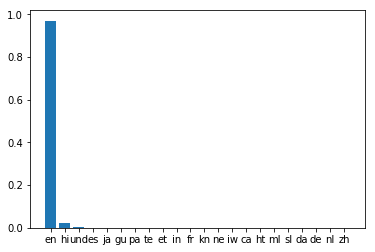

In [566]:
#Plot for language graph
plt.bar(range(len(language)), language.values(), align='center')
plt.xticks(range(len(language)), list(language.keys()))
plt.show()

In [567]:
#Average likes on tweet
sum(file['Like'])/len(file)

10584.655876632398

In [568]:
#Average replies on tweets
sum(file['Reply'])/len(file)

631.9053903862184

In [569]:
#Average retweets on tweet
sum(file['Retweets'])/len(file)

2744.7879966657406

no     0.582523
yes    0.417477
Name: Media, dtype: float64


/home/piyush/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: pd.groupby() is deprecated and will be removed; Please use the Series.groupby() or DataFrame.groupby() methods
  # Remove the CWD from sys.path while we load stuff.


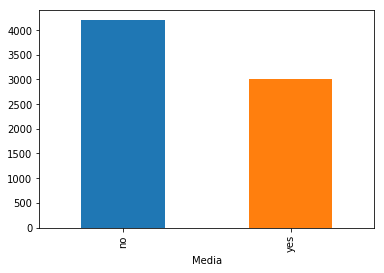

In [570]:
Media=[]
r=("pic.twitter.*|pscp.tv.*|instagram.com|youtube.com")
for i in file.Tweet:
    if re.search(r,i):
        Media.append('yes')
    else:
        Media.append('no')
file['Media']=Media
print(file['Media'].value_counts()/len(file))
pd.groupby(file['Tweet'],by=file['Media']).count().plot("bar")

In [571]:
file['Date']= pd.to_datetime(file['Date'], errors='coerce')

In [572]:
#Extract some features like year,month 
file['year']=file['Date'].dt.year
file['month']=file['Date'].dt.month
file['day']=file['Date'].dt.day
file['hour']=[i.split(":")[0] for i in file['Time']]

/home/piyush/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pd.groupby() is deprecated and will be removed; Please use the Series.groupby() or DataFrame.groupby() methods
  


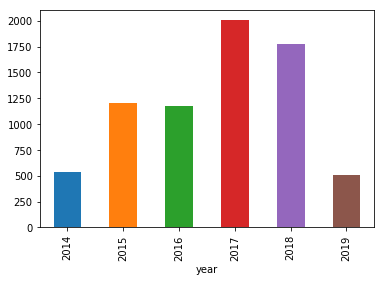

In [573]:
#Showing number of tweets based on year
pd.groupby(file['Tweet'],by=file['year']).count().plot("bar")

/home/piyush/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pd.groupby() is deprecated and will be removed; Please use the Series.groupby() or DataFrame.groupby() methods
  


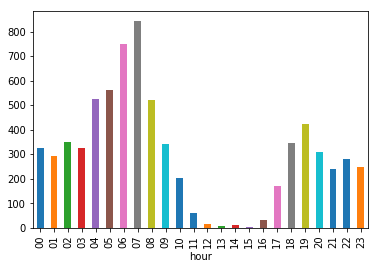

In [574]:
#Number of tweets based on hours
pd.groupby(file['Tweet'],by=file['hour']).count().plot("bar",)

In [575]:
# Function to clean the text
words=set(stopwords.words('english'))
def clean(text):
    wnl=WordNetLemmatizer()
    #Lower all words
    text=text.lower()
    # Remove 's' with blank
    text=re.sub("\'s","",text)
    #Replace \n with space
    text=re.sub("\n"," ",str(text))
    #Replace the pattern with space
    text=re.sub(r'pic.*',"",str(text))
    #Remove all numeric words
    text=" ".join(w for w in text.split() if not w.isnumeric())
    #Replace the pattern with space
    text=re.sub(r"http.*","",str(text))
    #Remove stopwords
    text=" ".join(i for i in text.split() if i not in words)
    #Convert all words to its lemma form
    text=" ".join(wnl.lemmatize(i,"v") for i in text.split())
    return text


In [576]:
# Function to remove punctuation
string_punctuation = ".?-:,_;"
def remove_punctuation(s):
    no_punct = ""
    for letter in s:
        if letter not in string_punctuation:
            no_punct += letter
        return no_punct

In [577]:
#Apply function to remove punctuation except # and @
file['clean_tweet']=file['Tweet'].apply(remove_punctuation)

In [578]:
# Clean the tweets
file['clean_tweet']=file['Tweet'].apply(clean)

In [579]:
#Let's combine all the words used in tweet
all_words=" ".join(word for word in file[file['Language']=='en']['clean_tweet'])

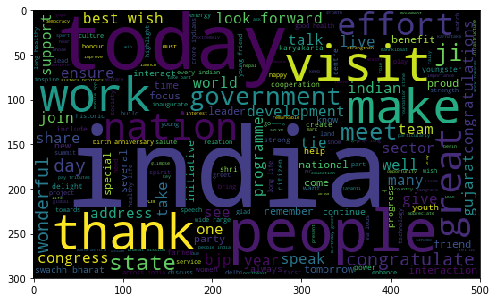

In [580]:
#Wordcloud of all words
wordcloud=WordCloud(width=500,height=300,random_state=21).generate(all_words)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)

In [581]:
#Funtion to find all hashtags
def _hashtag(input_text):
    hashtag=[]
    for i in input_text:
        word=re.findall(r"#[\w]*",i)
        hashtag.append(word)
    return hashtag

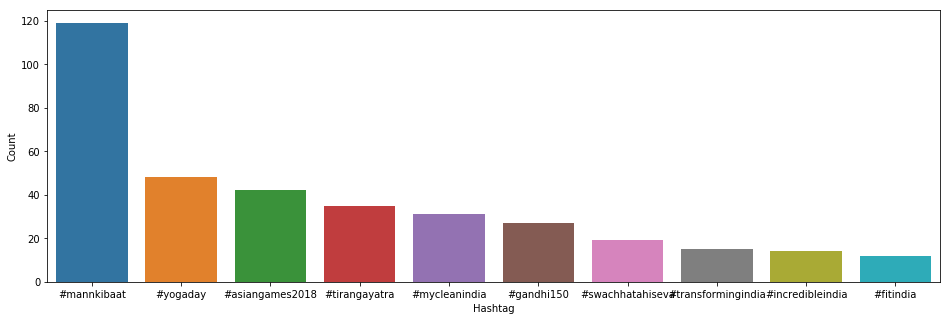

In [582]:
# Showing top 10 hashtags 
HT=_hashtag(file['clean_tweet'])
HT_all=sum(HT,[])
a=nltk.FreqDist(HT_all)
d=pd.DataFrame({'Hashtag': list(a.keys()),'Count':list(a.values())})
d=d.nlargest(columns='Count',n=10)
plt.figure(figsize=(16,5))
ax=sns.barplot(data=d,x='Hashtag',y='Count')
ax.set(ylabel='Count')
plt.show()

In [583]:
# Function to find all the tags used 
def _tag(input_text):
    tag=[]
    for i in input_text:
        word=re.findall(r"@[\w]*",i)
        tag.append(word)
    return tag

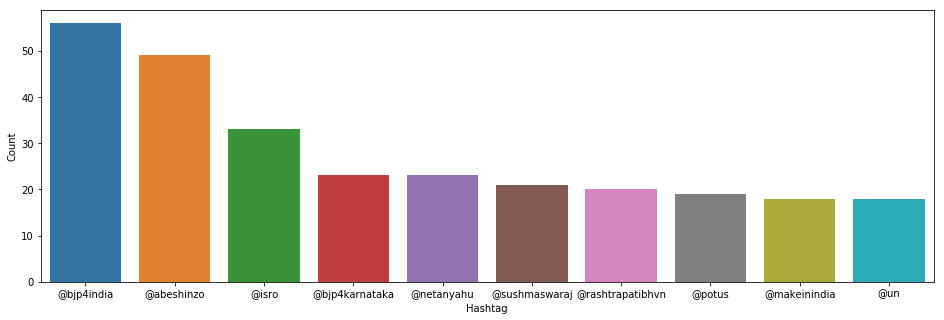

In [584]:
# Showing the top 10 tags 
Tag_all=sum(Tag,[])
Tag=_tag(file['clean_tweet'])
p=nltk.FreqDist(Tag_all)
q=pd.DataFrame({'Hashtag': list(p.keys()),'Count':list(p.values())})
q=q.nlargest(columns='Count',n=10)
plt.figure(figsize=(16,5))
ax=sns.barplot(data=q,x='Hashtag',y='Count')
ax.set(ylabel='Count')
plt.show()

In [585]:
# Average tweet per day
len(file)/1729

4.1631000578369

In [591]:
#Average tweet during elections is almost 1.5 times than ordinary day.
len(file.loc[(file['Date'] >= '2018-10-11') & (file['Date'] <='2018-12-07' )])/58

6.568965517241379